### 52 Week Summary for Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories for 2018 - 2019 Season

In [6]:
# for plotting
library(ggplot2)
# for melt method
library(reshape2)

### Read the last 52 weeks of data from input csv, define columns to select and customize xticks to display

In [7]:

# read data from csv, skip first line containing comments
clData <- read.csv("./FluViewPhase2Data/52WeekFluData/WHO_NREVSS_Clinical_Labs.csv", skip=1)
clData <- tail(clData, 52) 
paddedWeek <- formatC(clData$WEEK, width = 2, format = "d", flag = "0")
# combine year and week and use them as xticks when plotting
xticks <- paste(as.character(clData$YEAR), as.character(paddedWeek), sep="")

columns <- c("TOTAL.A", "TOTAL.B")

customLabels <- c("A", "B")


### To plot the bars melt the columns of data into variable and value columns using the melt() function
#### Also define another dataframe for plotting lines correponding to the percent statistics

In [8]:
# get the data that we care and melt it
positiveData <- clData[, columns]
positiveData$category <- xticks
mPositiveData <- melt(positiveData, id.vars = "category")

# for plotting lines define a new dataframe containing the columns "PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B"
new_df <- clData[, c("PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B")]
new_df$category <- xticks
new_df$variable <- rep("null", nrow(new_df))

### Finally plot the bars using the variable column of the melted dataframe and also plot the three correponding lines for percentage statistics using the other dataframe

Note that the lines are plotted against a secondary y-axis towards the right scaled down to display the lines alongside the stacked bar graph

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


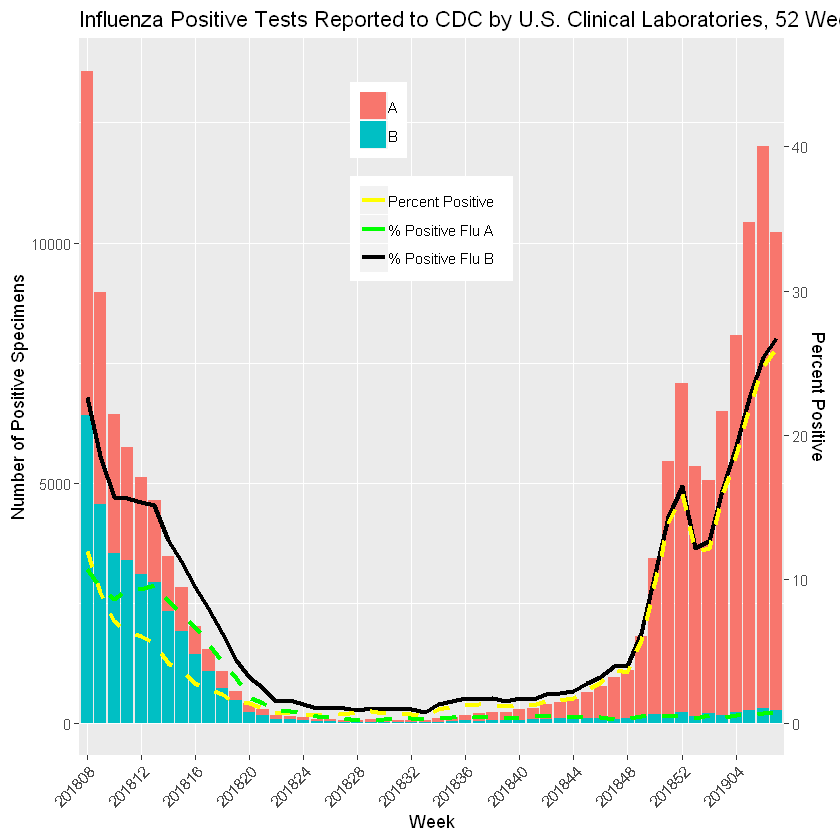

In [12]:
ggplot(
  data = mPositiveData,
  aes(
    category,
    value,
    fill = factor(variable, levels = columns, labels=customLabels)
  )) +
  geom_bar(stat = "identity") +
  ggtitle("Title") +
  ylim(0, 3000) +
  theme(legend.title=element_blank(), , legend.position=c(.5, .8), axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 52 Week Summary, 2018 - 2019 Season") +
  xlab("Week") +
  ylab("Number of Positive Specimens") +
  scale_y_continuous(sec.axis = sec_axis(~./300, name = "Percent Positive")) +
  geom_line(aes(y = PERCENT.POSITIVE*300, group=1, colour = "Percent Positive"), data=new_df, size=1.2) +
  geom_line(aes(y = PERCENT.A*300, group=1, colour = "% Positive Flu A"), data=new_df, linetype="dashed", size=1.2) +
  geom_line(aes(y = PERCENT.B*300, group=1, colour = "% Positive Flu B"), data=new_df, linetype="dashed", size=1.2) +
  scale_color_manual(values = c("yellow", "green", "black"), labels=c("Percent Positive", "% Positive Flu A", "% Positive Flu B")) +
  scale_linetype_manual(values = c(2, 2, 1)) +
  scale_x_discrete(breaks=mPositiveData$category[c(TRUE, FALSE, FALSE, FALSE)])
